## **RED WINE QUALITY**
***************************************************************************

### **INTRODUCTION**
********************************************************

#### **GOAL**
<br> These days data analysis is an essential part of technologies and other industries, observations of collected data provide the opportunity to understand user habits and inprove performance of technology, as well as to discover ideas for future. The purpose of this project was to **analyse factors inluencing the quality of red wine using statistical analysis and modeling.**

#### **APPROACH**
* Overview of general data red wine.
* Exploration of correlation and variability of features.
* Prediction of alcohol content in wine using linear regression models. 
* Prediction of wine quality using logistic regression models.

#### **DATA USED**
<br>[Wine Quality Dataset](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009) from Kaggle containing data about 1600 red wines.

------------------------
### IMPORTING PACKAGES AND DATA LOADING
-------------------------------------

In [1]:
import pandas as pd
import numpy as np

# For visualisations
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from functions import *
import missingno as msno

# For statistical analysis
import statsmodels.api as sm
import scipy.stats.distributions as dist

# For display of multiple variables
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

# For regressions
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.linear_model import (
    LinearRegression,
    LogisticRegressionCV,
    LogisticRegression,
    ElasticNetCV,
)
from sklearn.metrics import confusion_matrix, classification_report


# properties of plots
color = "#115396"
font = "Cambria"
alpha = 0.5

Loading and preview of data:

In [2]:
df = pd.read_csv("winequality-red.csv")

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Description of features:

* **Fixed acidity**: most acids involved with wine or fixed or nonvolatile (do not evaporate readily).
* **Volatile acidity**: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.
* **Citric acid**: found in small quantities, citric acid can add 'freshness' and flavor to wines.
* **Residual sugar**: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.
* **Chlorides**: the amount of salt in the wine.
* **Free sulfur dioxide**: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.
* **Total sulfur dioxide**: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.
* **Density**: the density of water is close to that of water depending on the percent alcohol and sugar content.
* **pH**: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.
* **Sulphates**: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant.
* **Alcohol**: the percent alcohol content of the wine.
* **Quality**: output variable (based on sensory data, score between 0 and 10).

-------------------------------
### DATA EXPLORATION AND CLEANING
*****************************************************************

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


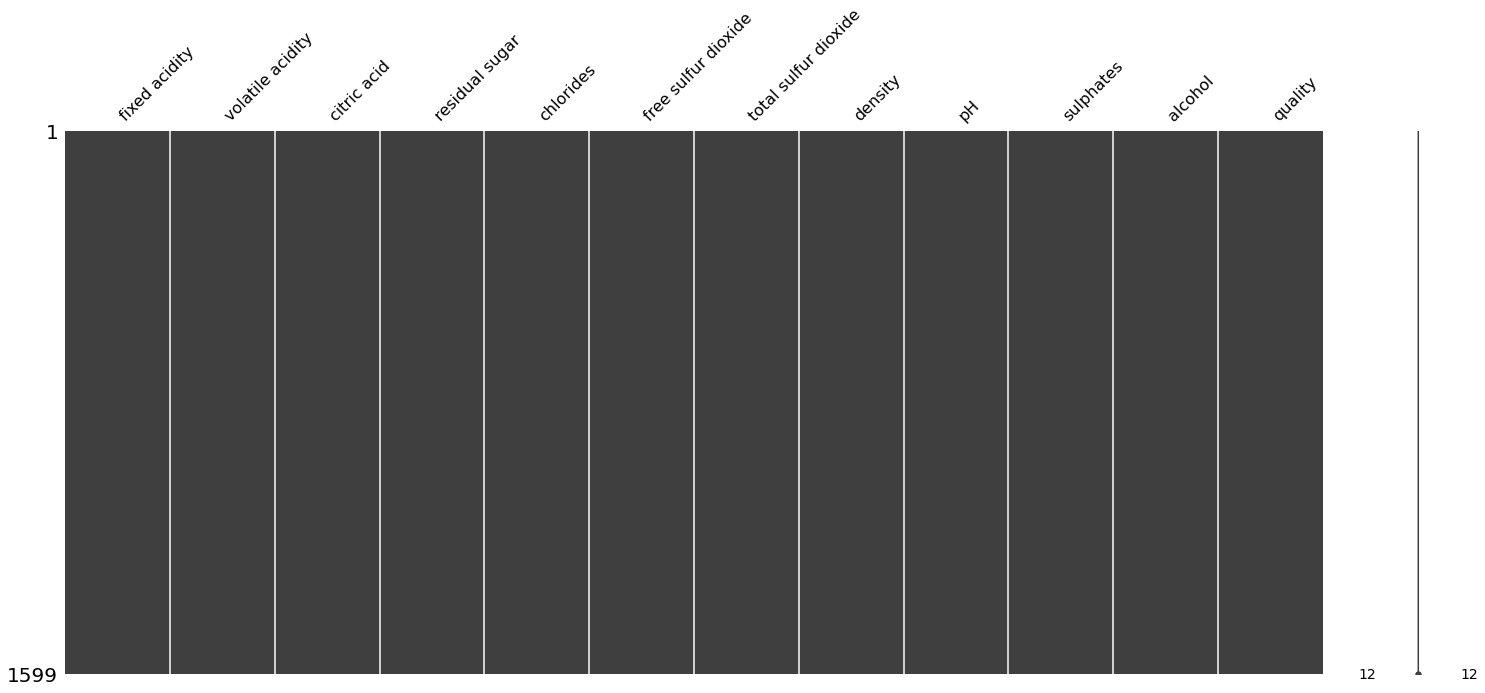

In [4]:
# Visaul representation of missing values

msno.matrix(df);

In [5]:
# checking for duplicated values
df.duplicated().sum()

# dropping duplicates
df.drop_duplicates(inplace=True)

# checking again
df.duplicated().any()

240

False

In [6]:
df.reset_index(inplace=True)
df.drop(columns="index", inplace=True)

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Visual representation of features:

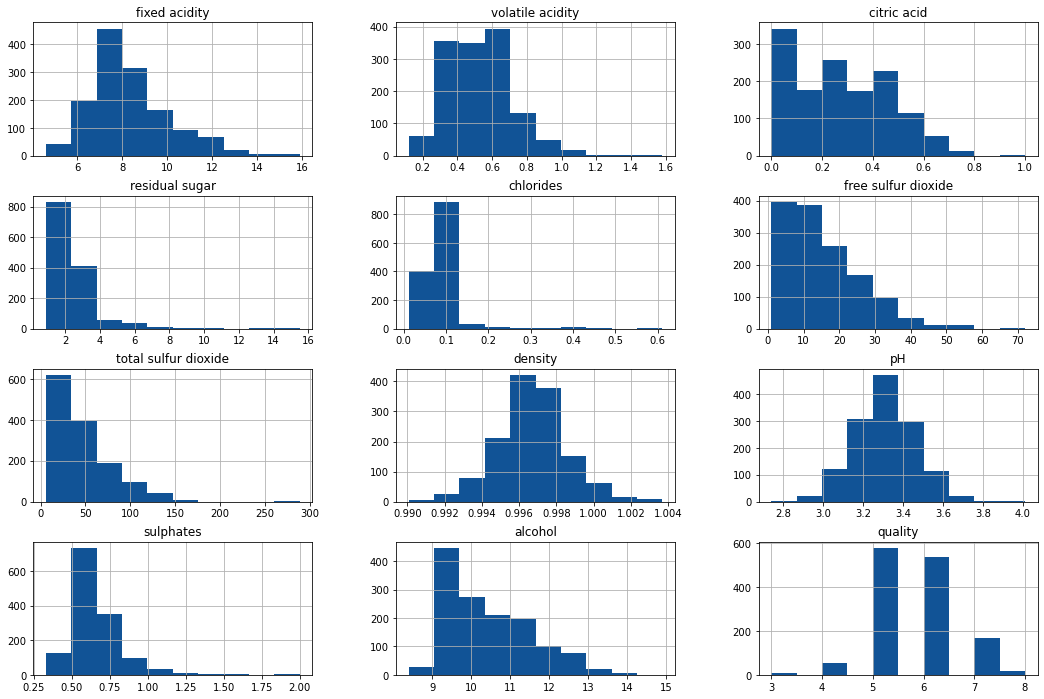

In [8]:
df.hist(figsize=(18, 12), color=color);

It may be seen that most of features are not normally distributed and have extremely different scales of measure units, these qualities of data might contribute to inaccuracy of analysis and models.
<br>It is clear that some features may be related (i.e. density and alcohol content, or acidity and pH), it will be explored later in notebook.


<br>It was stated in the outside source that most important qualities for taste of wine - **volatile acidity, residual sugar, alcohol**, hopefully, same results will be revealed after analysis.

The main focus of analysis is quality of wine, therefore it is important to explore this feature:

In [9]:
# Calculation of precentage distribution of quality groups

df.reset_index(inplace=True)

wines_num = len(df)
grouped_quality = (
    df.groupby("quality").agg(number=("index", "nunique")).sort_values(by="quality")
)
grouped_quality["percentage"] = round(grouped_quality["number"] * 100 / wines_num, 2)
grouped_quality

df.drop(columns="index", inplace=True)

,number,percentage
quality,,
3,10,0.74
4,53,3.90
5,577,42.46
6,535,39.37
7,167,12.29
8,17,1.25


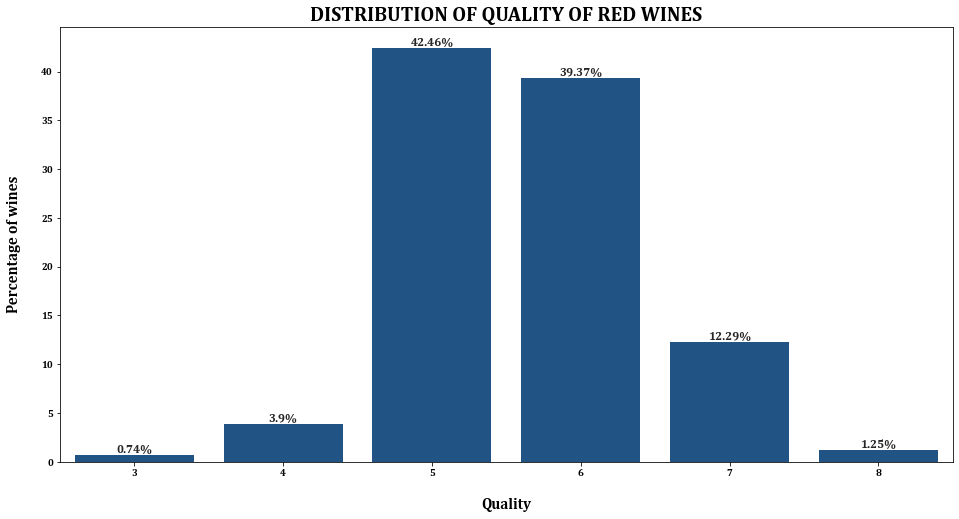

In [10]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x=grouped_quality.index, y=grouped_quality["percentage"], color=color)
plt.xlabel("Quality", size=15, labelpad=20, fontweight="bold", fontname=font)
plt.ylabel("Percentage of wines", size=15, labelpad=20, fontweight="bold", fontname=font)
plt.title("DISTRIBUTION OF QUALITY OF RED WINES", size=20, weight="bold", fontname=font)
plt.yticks(fontweight="bold", fontname=font)
plt.xticks(fontweight="bold", fontname=font)
sns.set_style("whitegrid")


def bar_values(ax):
    """presenting bar value on top"""
    for p in ax.patches:
        _x = p.get_x() + p.get_width() / 2
        _y = p.get_y() + p.get_height()
        value = f"{(p.get_height())}%"
        ax.text(
            _x,
            _y,
            value,
            verticalalignment="bottom",
            ha="center",
            fontsize=12,
            fontweight="semibold",
            fontname=font,
        )


bar_values(ax);

The range of quality is from 1 to 10, but in this dataset only classes presented are from 3  to 8.
The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).


Other important feature for analysis is alcohol content in wine:

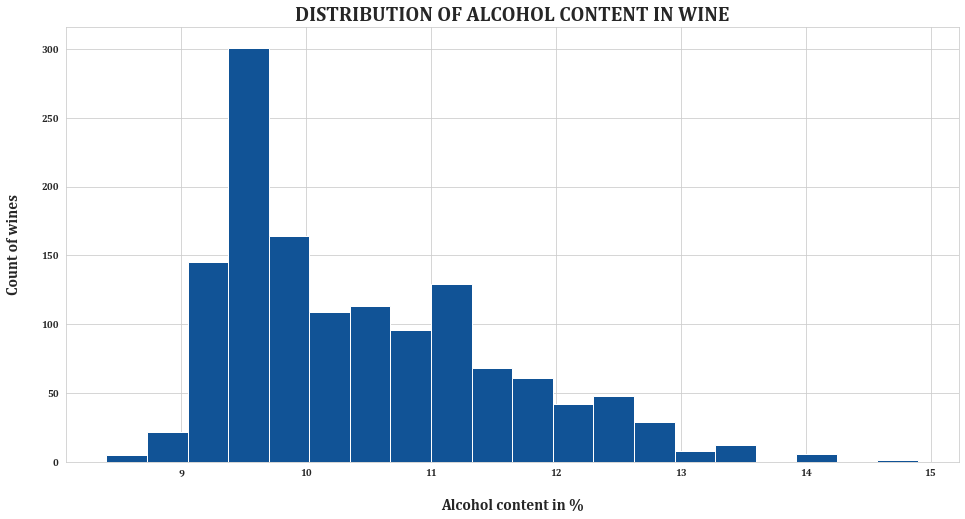

In [11]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.hist(df["alcohol"], color=color, bins=20)
plt.xlabel(
    "Alcohol content in %", size=15, labelpad=20, fontweight="bold", fontname=font
)
plt.ylabel("Count of wines", size=15, labelpad=20, fontweight="bold", fontname=font)
plt.title(
    "DISTRIBUTION OF ALCOHOL CONTENT IN WINE", size=20, weight="bold", fontname=font
)
plt.yticks(fontweight="bold", fontname=font)
plt.xticks(fontweight="bold", fontname=font)
sns.set_style("whitegrid");

It may be seen that alcohol distribution is righ skewed.<br>The range of alcohol content in wine is between **8.4 and 14.9**. <br>Most of wines have precetage of alcohol between **9.5 and 11**.

As mentioned before, some of the features in dataset might be related, for this reason it is important to explore correlation of features:

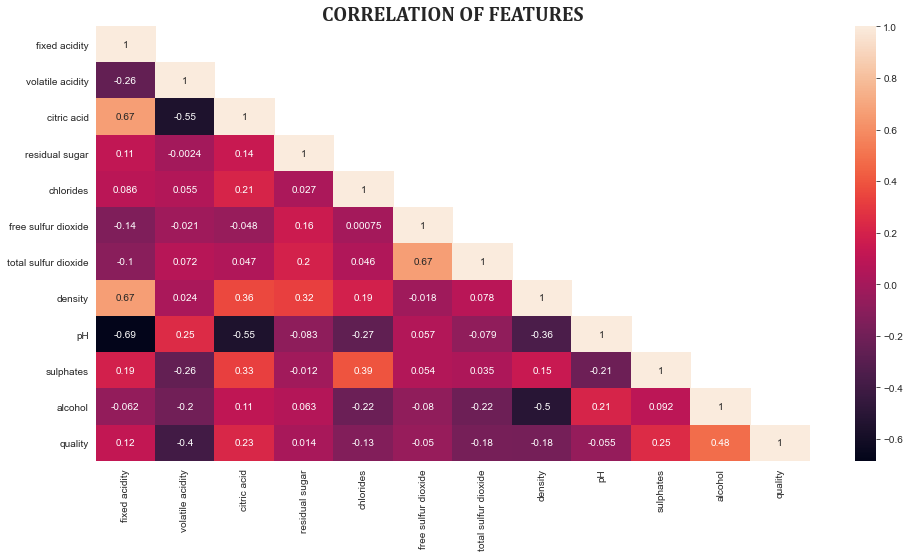

In [12]:
correlations = df.corr()
mask = np.triu(correlations, 1)

fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(data=df.corr(), mask=mask, annot=True)

plt.title("CORRELATION OF FEATURES", size=20, weight="bold", fontname=font);

The strongest correlation is discovered between pH and fixed acidity and content of citric acid.
<br> Also, there is relatively strong correlation between alcohol content and density of wine.
<br>It may be also observed that quality of wine has correlation with volatile acidity and alcohol content, this corresponds to information of outside source mentioned before.
<br>All in all, most of features are not strongly correlated.

It has been decided to explore some of relationships between features using visual tools:

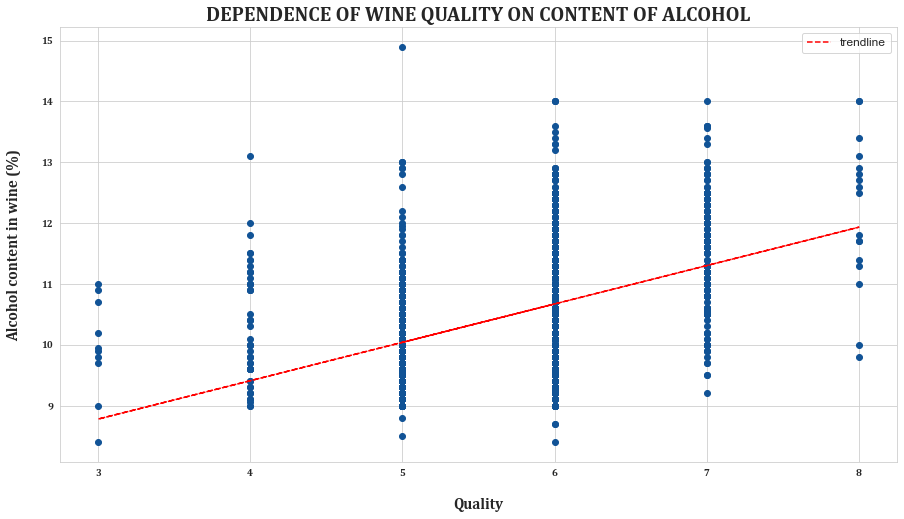

In [13]:
x = df["quality"]
y = df["alcohol"]

fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(x, y, color=color)

# display of trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--", label="trendline")

# parameters of plot
plt.xlabel("Quality", size=15, labelpad=20, fontweight="bold", fontname=font)
plt.ylabel(
    "Alcohol content in wine (%)",
    size=15,
    labelpad=20,
    fontweight="bold",
    fontname=font,
)
plt.title(
    "DEPENDENCE OF WINE QUALITY ON CONTENT OF ALCOHOL",
    size=20,
    weight="bold",
    fontname=font,
)
plt.yticks(fontweight="bold", fontname=font)
plt.xticks(fontweight="bold", fontname=font)

# display pf legend
ax.legend(fontsize=12)
mpl.rc("font", family="Cambria");

It may be seen that all categories vary in content of alcohol content, but generally alcohol content increase with higher quality.
<br>In order to justify this idea, hypothesis testing will be performed.
<br>Wine will be divided into two categories by quality - low and high quality wines.
<br>Low quality wine is defined as having quality score lower than 5.
<br>High quality wine is defined as having quality higher score than 6.

In [14]:
low_quality = df.loc[df["quality"] < 5]["alcohol"]
high_quality = df.loc[df["quality"] > 6]["alcohol"]

print(
    f"Average alcohol content in high quality wine (μ1) {high_quality.mean():.3f} with standard deviation of {high_quality.std():.3f} and the size of the sample {len(high_quality)}."
)
print(
    f"Average alcohol content in low quality wine (μ2) {low_quality.mean():.3f} with standard deviation of {low_quality.std():.3f} and the size of the sample {len(low_quality)}."
)

Average alcohol content in high quality wine (μ1) 11.553 with standard deviation of 1.012 and the size of the sample 184.
Average alcohol content in low quality wine (μ2) 10.216 with standard deviation of 0.918 and the size of the sample 63.


#### HYPOTHESIS TESTING

**HYPOTHESIS 0** - There is no significant difference in average alcohol content between wines of high and low quality.
<br>$H_0$: $μ_1$=$μ_2$

<br>**HYPOTHESIS 1** - Average alcohol content in high quality wines is significantly higher than average alcohol content in wines of low quality.
<br>$H_0$: $μ_1$>$μ_2$

<br>**Significance level is 5%.**
<br>**α = 0.05**

In [15]:
alpha = 0.05

group_t_stats, group_p_value, degreesf = sm.stats.ttest_ind(
    high_quality, low_quality, alternative="larger"
)

print(
    f"T-statistics value: {round(group_t_stats, 3)}\n",
    f"P-value: {round(group_p_value, 5)}",
)

if group_p_value > alpha:
    print("We fail to reject null hypothesis.")
else:
    print("We reject the null hypothesis.")

T-statistics value: 9.258
 P-value: 0.0
We reject the null hypothesis.


**Conclusion**: average alcohol content is higher in wines of better quality, this corresponds to idea that alcohol id one of main factors determinig quality of wine.

---------------------------------------------------------------------------------

Other quality determinig factor is volatile acidity:

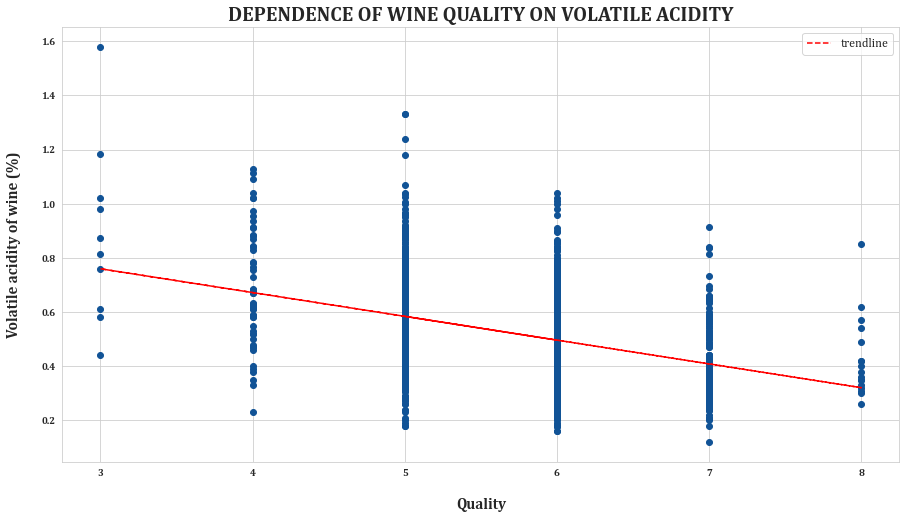

In [16]:
x = df["quality"]
y = df["volatile acidity"]

fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(x, y, color=color)

# display of legend
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--", label="trendline")

# parameters of plot
plt.xlabel("Quality", size=15, labelpad=20, fontweight="bold", fontname=font)
plt.ylabel(
    "Volatile acidity of wine (%)",
    size=15,
    labelpad=20,
    fontweight="bold",
    fontname=font,
)
plt.title(
    "DEPENDENCE OF WINE QUALITY ON VOLATILE ACIDITY",
    size=20,
    weight="bold",
    fontname=font,
)
plt.yticks(fontweight="bold", fontname=font)
plt.xticks(fontweight="bold", fontname=font)

# display of legend
ax.legend(fontsize=12);

Volatile acidity and quality are negatively correlated, therefore trendline is negatively inclined.
<br>According to visualisation, wines of higher quality have lower volatile acidity.
*****************************************************************

Other correlated features were content of alcohol and density of wine:

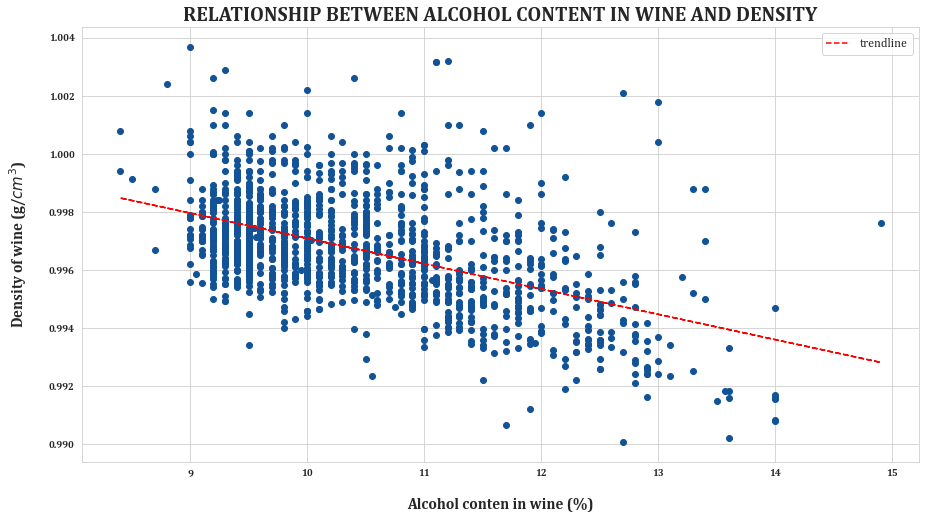

In [17]:
x = df["alcohol"]
y = df["density"]

fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(x, y, color=color)

# display of trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--", label="trendline")

# parameters of plot
plt.xlabel(
    "Alcohol conten in wine (%)", size=15, labelpad=20, fontweight="bold", fontname=font
)
plt.ylabel(
    "Density of wine (g/$cm^3$)", size=15, labelpad=20, fontweight="bold", fontname=font
)
plt.title(
    "RELATIONSHIP BETWEEN ALCOHOL CONTENT IN WINE AND DENSITY",
    size=20,
    weight="bold",
    fontname=font,
)
plt.yticks(fontweight="bold", fontname=font)
plt.xticks(fontweight="bold", fontname=font)

# legend
ax.legend(fontsize=12);

As stated in introduction, density of wine is similar to one of water, it is clear that with higher content of alcohol density of wine decreases.
<br>Density of alcohol is 0.789g/$cm^3$ in comparison with water which density is 1g/$cm^3$.
<br> This kind of relationship between features may impact future analysis and accuracy of models.
**********************************************************************************

### CREATING STATISTICAL MODELS
*****************************************************************

Quick review of dataset:

In [18]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


### Predicting alcohol content in wine using Linear Regression

Preparing variables and spliting dataset into training and testing parts:

In [19]:
x = df.drop(["alcohol"], axis=1)
y = df["alcohol"]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

### Linear Regression on data transformed by Standard Scaler

In [20]:
# creating linear regression model with Standard Scaler
std_scale_model = Pipeline(
    [("scaler", StandardScaler()), ("regression", LinearRegression())]
)

# fitting model on training dataset
model = std_scale_model.fit(x_train, y_train)

In [21]:
coef = std_scale_model.score(x_test, y_test)
print(f"Regression coefficient: {round(coef, 3)}.")

intercept = model.named_steps["regression"].intercept_
print(f"Intercept: {round(intercept, 3)}.")

results = pd.DataFrame(
    model.named_steps["regression"].coef_, x_test.columns, columns=["Coeff"]
).T.round(3)
results

Regression coefficient: 0.679.
Intercept: 10.435.


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
Coeff,0.89,0.094,0.158,0.358,-0.032,-0.024,-0.062,-1.089,0.573,0.161,0.201


Higher coefficients corresponds to higher influence of feature when predicting target variable.
<br>In this case it is density, pH, fixed acidity.
<br>Majority of coefficients are close to 0.

In [22]:
# Data preparation for residual plot

y_train_sorted = y_train.sort_values()
x_train_sorted = x_train.reindex(y_train_sorted.index)
y_test_sorted = y_test.sort_values()
x_test_sorted = x_test.reindex(y_test_sorted.index)

predictions_train = model.predict(x_train_sorted)
residuals_train = y_train_sorted.to_numpy() - predictions_train
predictions_test = model.predict(x_test_sorted)
residuals_test = y_test_sorted.to_numpy() - predictions_test

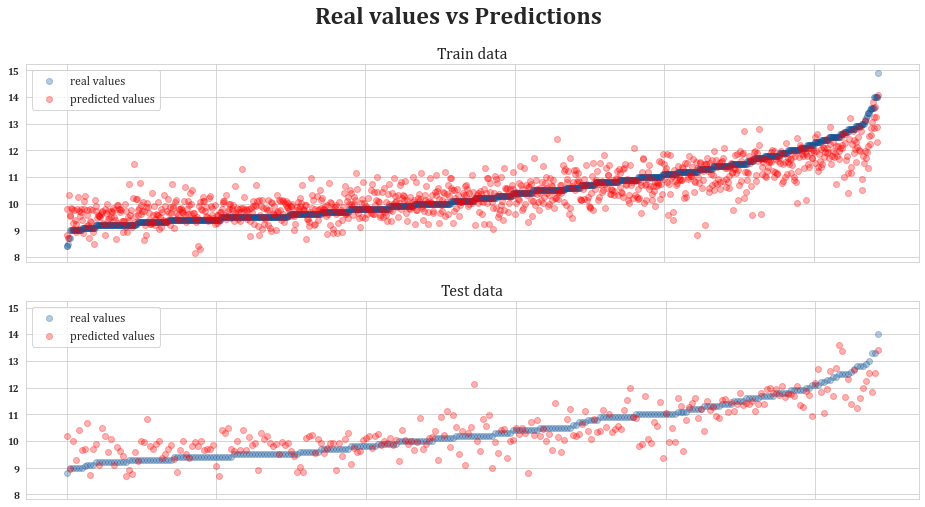

In [23]:
real_vs_predicted_plots(
    y_train_sorted, predictions_train, y_test_sorted, predictions_test
);

In [24]:
coef_train = std_scale_model.score(x_train, y_train)
print(f"Regression coefficient for train data: {round(coef_train, 3)}.")
print(f"Regression coefficient for test data: {round(coef, 3)}.")

Regression coefficient for train data: 0.708.
Regression coefficient for test data: 0.679.


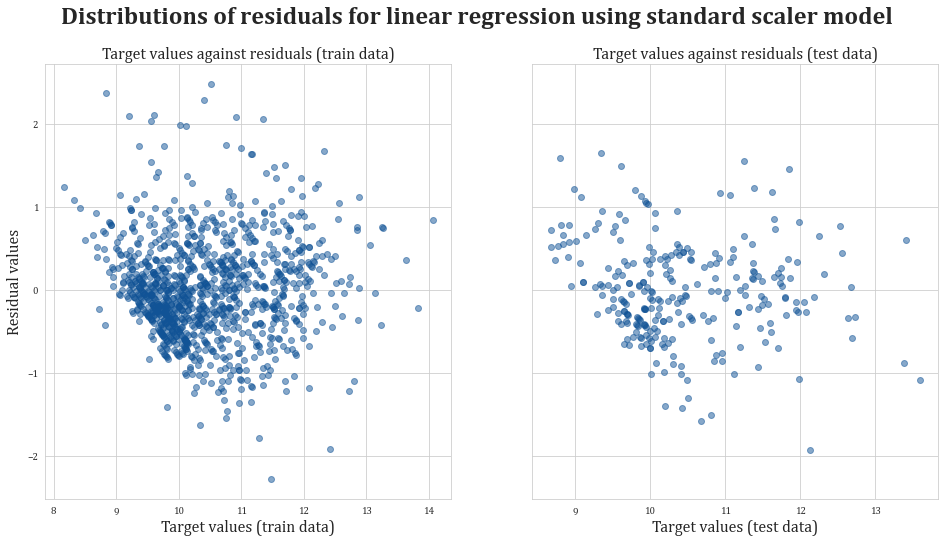

In [25]:
residual_plots(
    predictions_train,
    residuals_train,
    predictions_test,
    residuals_test,
    "linear regression using standard scaler",
)

In [26]:
print(f"Largest positive residual (train data): {round(residuals_train.max(), 3)}.")
print(f"Largest negative residual (train data): {round(residuals_train.min(), 3)}.")
print(f"Largest positive residual (test data): {round(residuals_test.max(), 3)}.")
print(f"Largest negative residual (test data): {round(residuals_test.min(), 3)}.")

Largest positive residual (train data): 2.481.
Largest negative residual (train data): -2.28.
Largest positive residual (test data): 1.647.
Largest negative residual (test data): -1.933.


For comparison: 

In [27]:
pd.DataFrame(df["alcohol"].describe()).T

,count,mean,std,min,25%,50%,75%,max
alcohol,1359.0,10.432315,1.082065,8.4,9.5,10.2,11.1,14.9


Values of residuals are high in comparison with range of alcohol values.

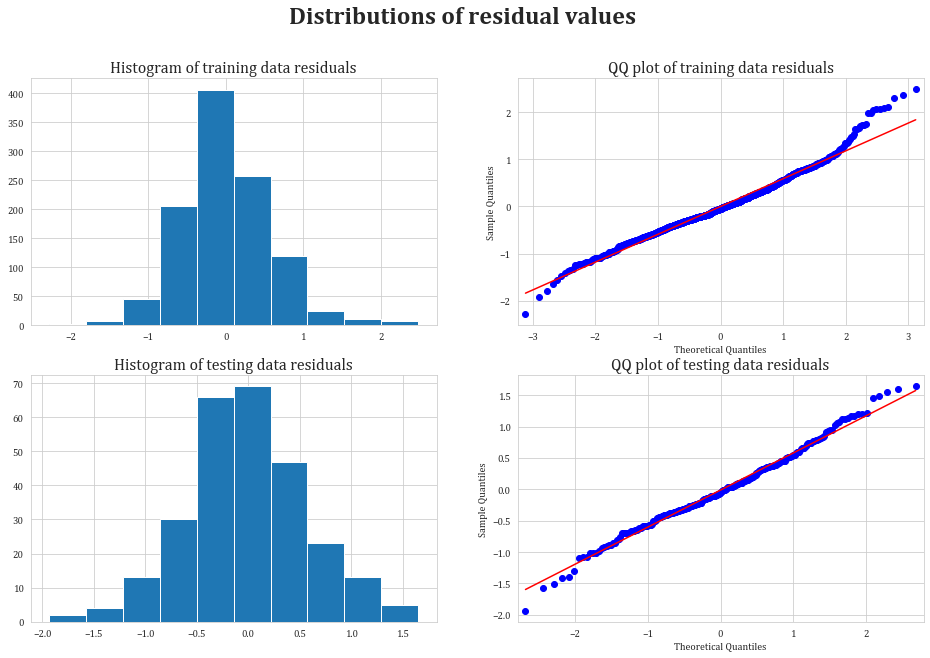

In [28]:
residual_hist_qq_plots(residuals_train, residuals_test);

### Linear regression transforming features and target values

Previous model was not very precise, for that reason it was decided to perform linear regression using different techniques.
<br>Independed variables were transformed using either Standard Scaler or Quantile Transformer based of distribution feature values.
<br>Target values were transformed in log scale.
<br>ElasticNetCV was used for regression

In [29]:
# features transformed by standard scaler
to_std_scaler = ["fixed acidity", "density", "pH", "quality"]

# features transformed by quantile transformer
to_qntl_transformer = list(set(x.columns) - set(to_std_scaler))

# transformer for values of independent features
column_trans = ColumnTransformer(
    [
        ("scaler", StandardScaler(), to_std_scaler),
        ("quantile", QuantileTransformer(), to_qntl_transformer),
    ]
)

# functions used to transform target values
def func(x):
    return np.log(x)


def inverse_func(x):
    return np.exp(x)


regressor = ElasticNetCV()

trans_model = TransformedTargetRegressor(
    regressor=regressor, func=func, inverse_func=inverse_func
)

# creating pipeline combining both transformers
xy_transformed_model = Pipeline(
    [("transformerX", column_trans), ("transformerY", trans_model)]
)

model = xy_transformed_model.fit(x_train, y_train)

In [30]:
coef = model.score(x_test, y_test)
print(f"Regression coefficient of test data: {round(coef, 3)}.")


intercept = model.named_steps["transformerY"].regressor_.intercept_
print(f"Intercept: {round(intercept, 3)}.")

results = pd.DataFrame(
    model.named_steps["transformerY"].regressor_.coef_,
    x_test.columns,
    columns=["Coeff"],
).T.round(3)
results

Regression coefficient of test data: 0.709.
Intercept: 2.236.


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
Coeff,0.072,-0.101,0.045,0.016,0.019,0.056,-0.031,0.13,-0.001,0.036,0.0


In [31]:
# Data preparation for residual plot

y_train_sorted = y_train.sort_values()
x_train_sorted = x_train.reindex(y_train_sorted.index)
y_test_sorted = y_test.sort_values()
x_test_sorted = x_test.reindex(y_test_sorted.index)

predictions_train = model.predict(x_train_sorted)
residuals_train = y_train_sorted.to_numpy() - predictions_train
predictions_test = model.predict(x_test_sorted)
residuals_test = y_test_sorted.to_numpy() - predictions_test

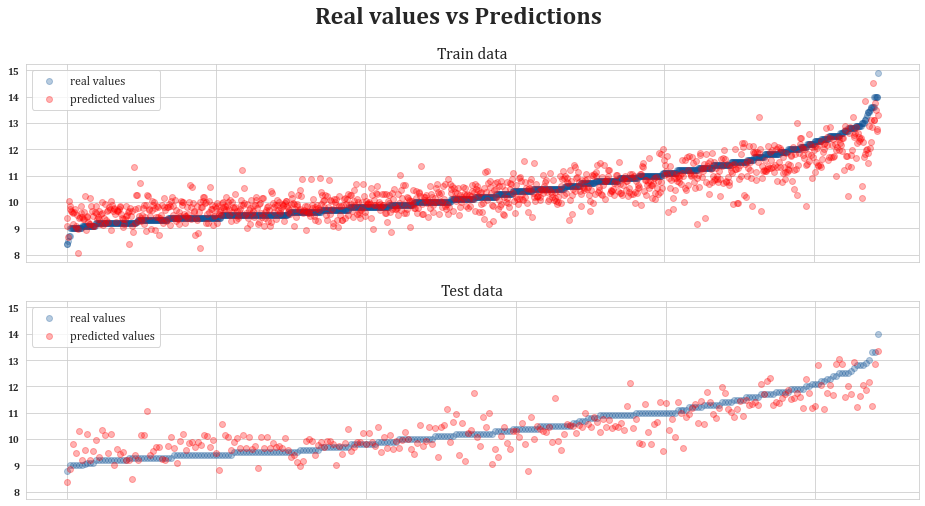

In [32]:
real_vs_predicted_plots(
    y_train_sorted, predictions_train, y_test_sorted, predictions_test
);

In [33]:
coef_train = std_scale_model.score(x_train, y_train)
print(f"Regression coefficient for train data: {round(coef_train, 3)}.")
print(f"Regression coefficient for test data: {round(coef, 3)}.")

Regression coefficient for train data: 0.708.
Regression coefficient for test data: 0.709.


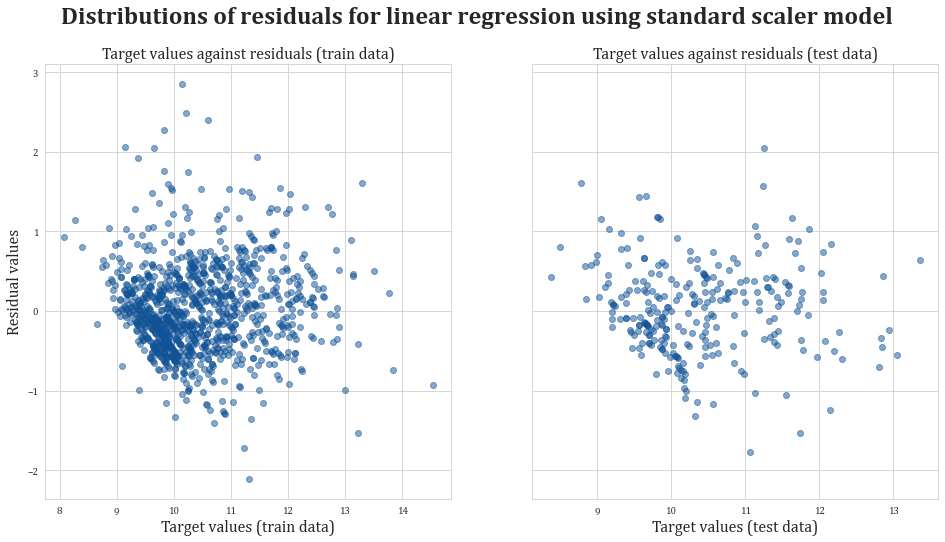

In [34]:
residual_plots(
    predictions_train,
    residuals_train,
    predictions_test,
    residuals_test,
    "linear regression using standard scaler",
);

In [35]:
print(f"Largest positive residual (train data): {round(residuals_train.max(), 3)}.")
print(f"Largest negative residual (train data): {round(residuals_train.min(), 3)}.")
print(f"Largest positive residual (test data): {round(residuals_test.max(), 3)}.")
print(f"Largest negative residual (test data): {round(residuals_test.min(), 3)}.")

Largest positive residual (train data): 2.855.
Largest negative residual (train data): -2.11.
Largest positive residual (test data): 2.046.
Largest negative residual (test data): -1.77.


In this case, $R^2$ value was not improved, but values of residuals are slightly lower.
<br>In addition, the change in coefficients may be seen - coefficient of pH is 0, the biggest coefficient is one of density.

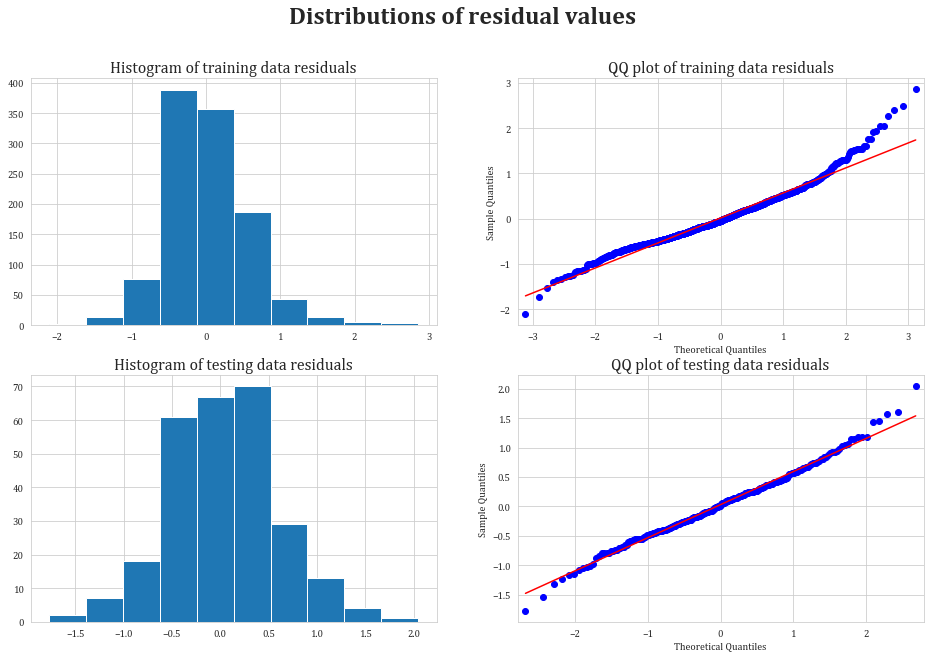

In [36]:
residual_hist_qq_plots(residuals_train, residuals_test);

****************************************************************************************
### Predicting quality of wine using Logistic Regression
**********************************************

#### Binary clasification
Dataset is divided into two parts based on quality feature.
<br>Wine, which quality is higher than 5 is considered to be of high quality and gets value of 1.
<br>Other wine is considered to be one of low quality and gets value of 0.
<br>Data is transformed using Standard Scaler. Logistic Regression with cross validation is used for predictions.

In [37]:
# new feature - good quality is > 5 (1), else - bad quality
df["quality1"] = np.where(df["quality"] > 5, 1, 0)

Preparing variables and spliting dataset into training and testing parts:

In [38]:
x = df.drop(["quality", "quality1"], axis=1)
y = df["quality1"]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [39]:
# creating Logistic regression model using Standard Scaler as tranformer for data
std_scale_log_model = Pipeline(
    [("scaler", StandardScaler()), ("regression", LogisticRegressionCV())]
)

# fitting model on training set
model = std_scale_log_model.fit(x_train, y_train)

In [40]:
coef = std_scale_log_model.score(x_test, y_test)
print(f"Regression coefficient: {round(coef, 3)}.")

intercept = model.named_steps["regression"].intercept_[0]
print(f"Intercept: {round(intercept, 3)}.")

results = pd.DataFrame(
    model.named_steps["regression"].coef_.T, x_test.columns, columns=["Coeff"]
).T.round(3)
results

Regression coefficient: 0.765.
Intercept: 0.238.


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
Coeff,-0.113,-0.483,-0.083,-0.018,-0.236,0.286,-0.617,0.143,-0.226,0.396,1.024


The most important features in this case are:
* **alcohol**,
* total sulfur dioxide,
* **volatile acidity**.

In [41]:
predictions = model.predict(x_test)

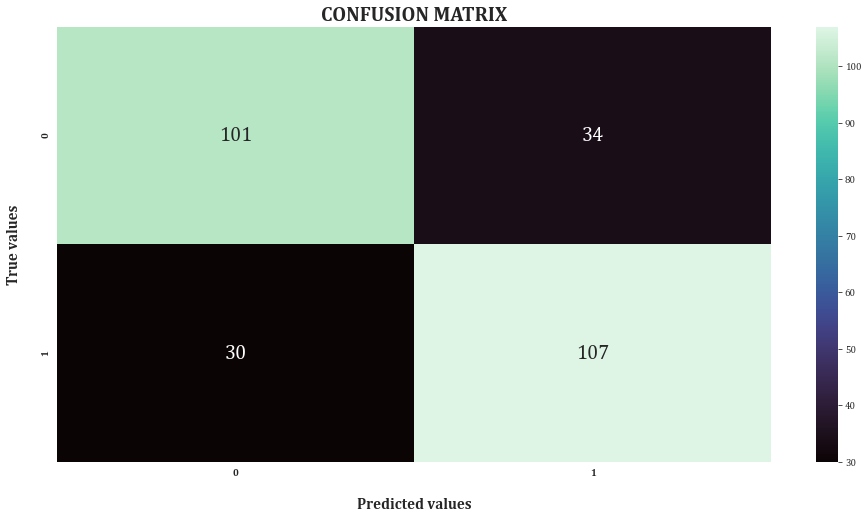

In [42]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(
    data=confusion_matrix(y_test, predictions),
    annot=True,
    annot_kws={"fontsize": 20},
    fmt="g",
    cmap="mako",
)
plt.xlabel("Predicted values", size=15, labelpad=20, fontweight="bold")
plt.ylabel("True values", size=15, labelpad=20, fontweight="bold")
plt.title("CONFUSION MATRIX", size=20, weight="bold")
plt.yticks(fontweight="bold")
plt.xticks(fontweight="bold");

In [43]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       135
           1       0.76      0.78      0.77       137

    accuracy                           0.76       272
   macro avg       0.76      0.76      0.76       272
weighted avg       0.76      0.76      0.76       272



*********************************************
#### Multiclass clasification

Preparing variables and spliting dataset into training and testing parts:

In [44]:
x = df.drop(["quality", "quality1"], axis=1)
y = df["quality"]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [45]:
# creating Logistic regression model using Standard Scaler as tranformer for data
std_scale_log_model = Pipeline(
    [("scaler", StandardScaler()), ("regression", LogisticRegression())]
)

# fitting model on training set
model = std_scale_log_model.fit(x_train, y_train)

In [46]:
coef = std_scale_log_model.score(x_test, y_test)
print(f"Regression coefficient: {round(coef, 3)}.")

intercept = pd.DataFrame(model.named_steps["regression"].intercept_)
intercept = intercept.round(3).set_index(np.arange(3, 9))
intercept = intercept.rename(columns={0: "Intercept"})
intercept.index.name = "Quality"
intercept

results = (
    pd.DataFrame(model.named_steps["regression"].coef_, columns=x_test.columns)
    .round(3)
    .set_index(np.arange(3, 9))
)
results.index.name = "Quality"
results

Regression coefficient: 0.607.


,Intercept
Quality,
3,-3.614
4,0.059
5,2.637
6,2.790
7,0.678
8,-2.551


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
Quality,,,,,,,,,,,
3,0.827,0.965,0.288,-1.062,0.799,0.479,-0.643,0.288,0.983,-0.618,-1.215
4,0.362,0.462,-0.052,0.499,0.267,-0.337,0.227,-0.483,0.479,-0.190,-0.646
5,-0.390,-0.010,-0.173,0.001,0.183,-0.204,0.780,0.258,-0.160,-0.355,-0.513
6,-0.437,-0.357,-0.225,0.006,0.029,0.076,0.164,0.332,-0.261,-0.035,0.358
7,0.231,-0.849,-0.347,0.303,-0.274,0.112,-0.159,-0.157,-0.181,0.471,0.831
8,-0.594,-0.210,0.509,0.253,-1.005,-0.126,-0.368,-0.239,-0.861,0.727,1.185


In [47]:
predictions = model.predict(x_test)

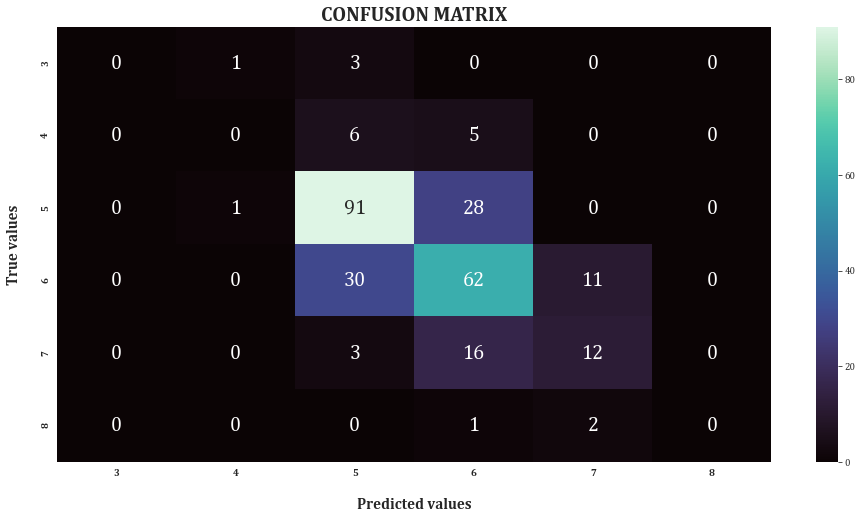

In [48]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(
    data=confusion_matrix(y_test, predictions),
    annot=True,
    annot_kws={"fontsize": 20},
    fmt="g",
    cmap="mako",
)
plt.xlabel("Predicted values", size=15, labelpad=20, fontweight="bold")
plt.ylabel("True values", size=15, labelpad=20, fontweight="bold")
plt.title("CONFUSION MATRIX", size=20, weight="bold")
plt.yticks(fontweight="bold")
plt.xticks(fontweight="bold")
ax.set_xticklabels(np.arange(3, 9))
ax.set_yticklabels(np.arange(3, 9));

In [49]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        11
           5       0.68      0.76      0.72       120
           6       0.55      0.60      0.58       103
           7       0.48      0.39      0.43        31
           8       0.00      0.00      0.00         3

    accuracy                           0.61       272
   macro avg       0.29      0.29      0.29       272
weighted avg       0.57      0.61      0.58       272



C:\Users\Erika\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***************************************************************
### CONCLUSION
Analysis of dataset was performed using different techniques of regressions and hypothesis testing. Main findings:
* Average alcohol content in high quality wines is significantly higher than average alcohol content in wines of low quality.
* Content of alcohol, volatile acidity, residual sugar features were confirmed to be main determining factors for quality of wine.
**************************************

### SUGGESTIONS FOR IMPROVEMTS
* Advanced analysis of content, i.e. synthesize data for quality categories of lower abundance.
* Introduce polynomial features in linear regression.
* More sophisticated choice of regression, i.e. - SVM.